In [1]:
# all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
import sklearn.preprocessing as pre

from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Importing Data

In [2]:
main_df=pd.read_csv(r"D:\study\DataScience\udemyFiles\Placement_Data_Full_Class.csv",index_col='sl_no')

In [3]:
print("Shape of the data ",main_df.shape)

Shape of the data  (215, 14)


In [4]:
main_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [6]:
main_df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
main_df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [8]:
#does all the rows with missing values have a status of Not Placed
status_df=main_df[main_df['status']=='Not Placed']
print("Shape of the data frame : ",status_df.shape,end="\n\n\n")
print("No of rows with rows as not placed : ",status_df['status'].value_counts(),end="\n\n\n")
print("No of rows with no salary : ",status_df['salary'].isnull().sum())

Shape of the data frame :  (67, 14)


No of rows with rows as not placed :  Not Placed    67
Name: status, dtype: int64


No of rows with no salary :  67


In [9]:
#Segmentation
num_cols=list(main_df.select_dtypes(exclude=['object']).columns)
cat_cols=list(main_df.select_dtypes(include=['object']).columns)
print("All columns with numeric values : ",num_cols)
print("All columns with categorical values : ",cat_cols)

All columns with numeric values :  ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
All columns with categorical values :  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [10]:
main_df[num_cols].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [11]:
main_df[cat_cols].describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


# 2. Data Visualisation

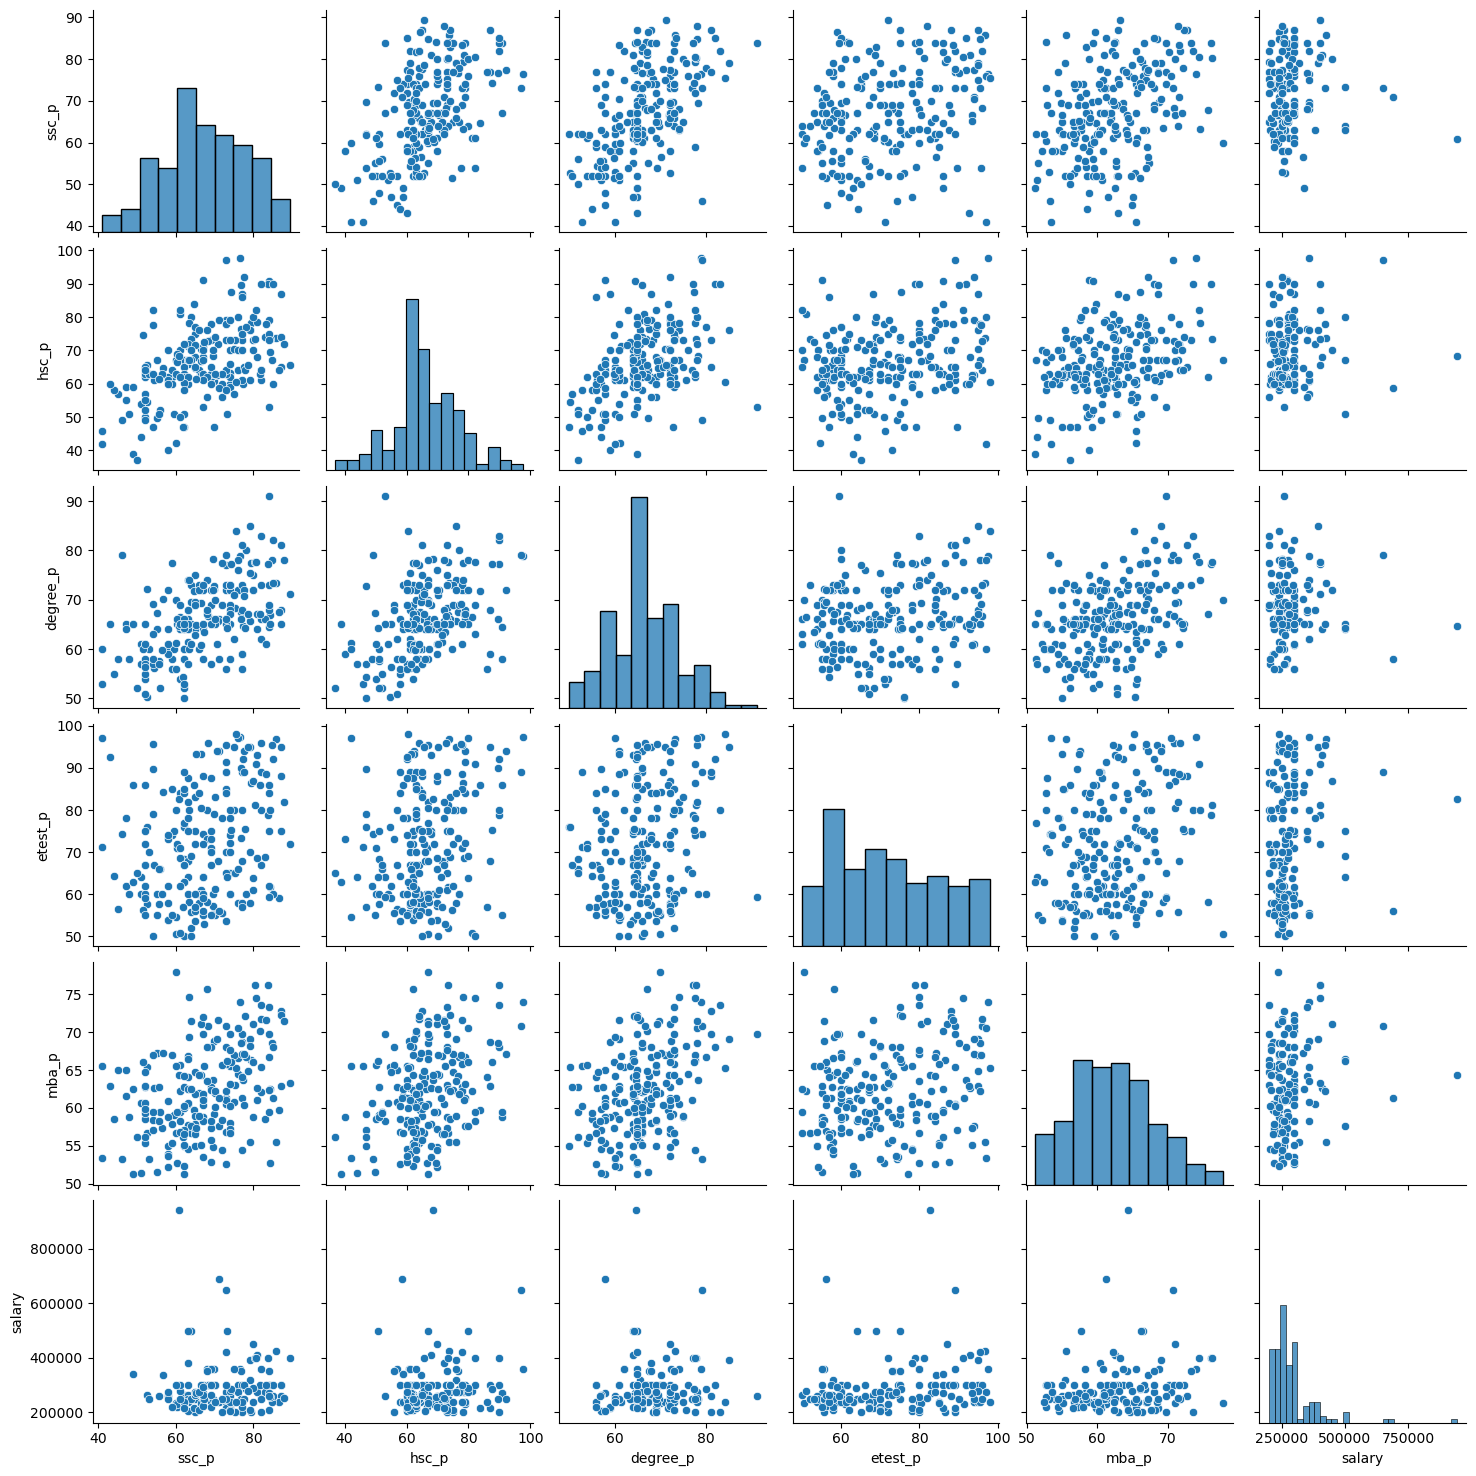

In [12]:
sns.pairplot(main_df[num_cols])

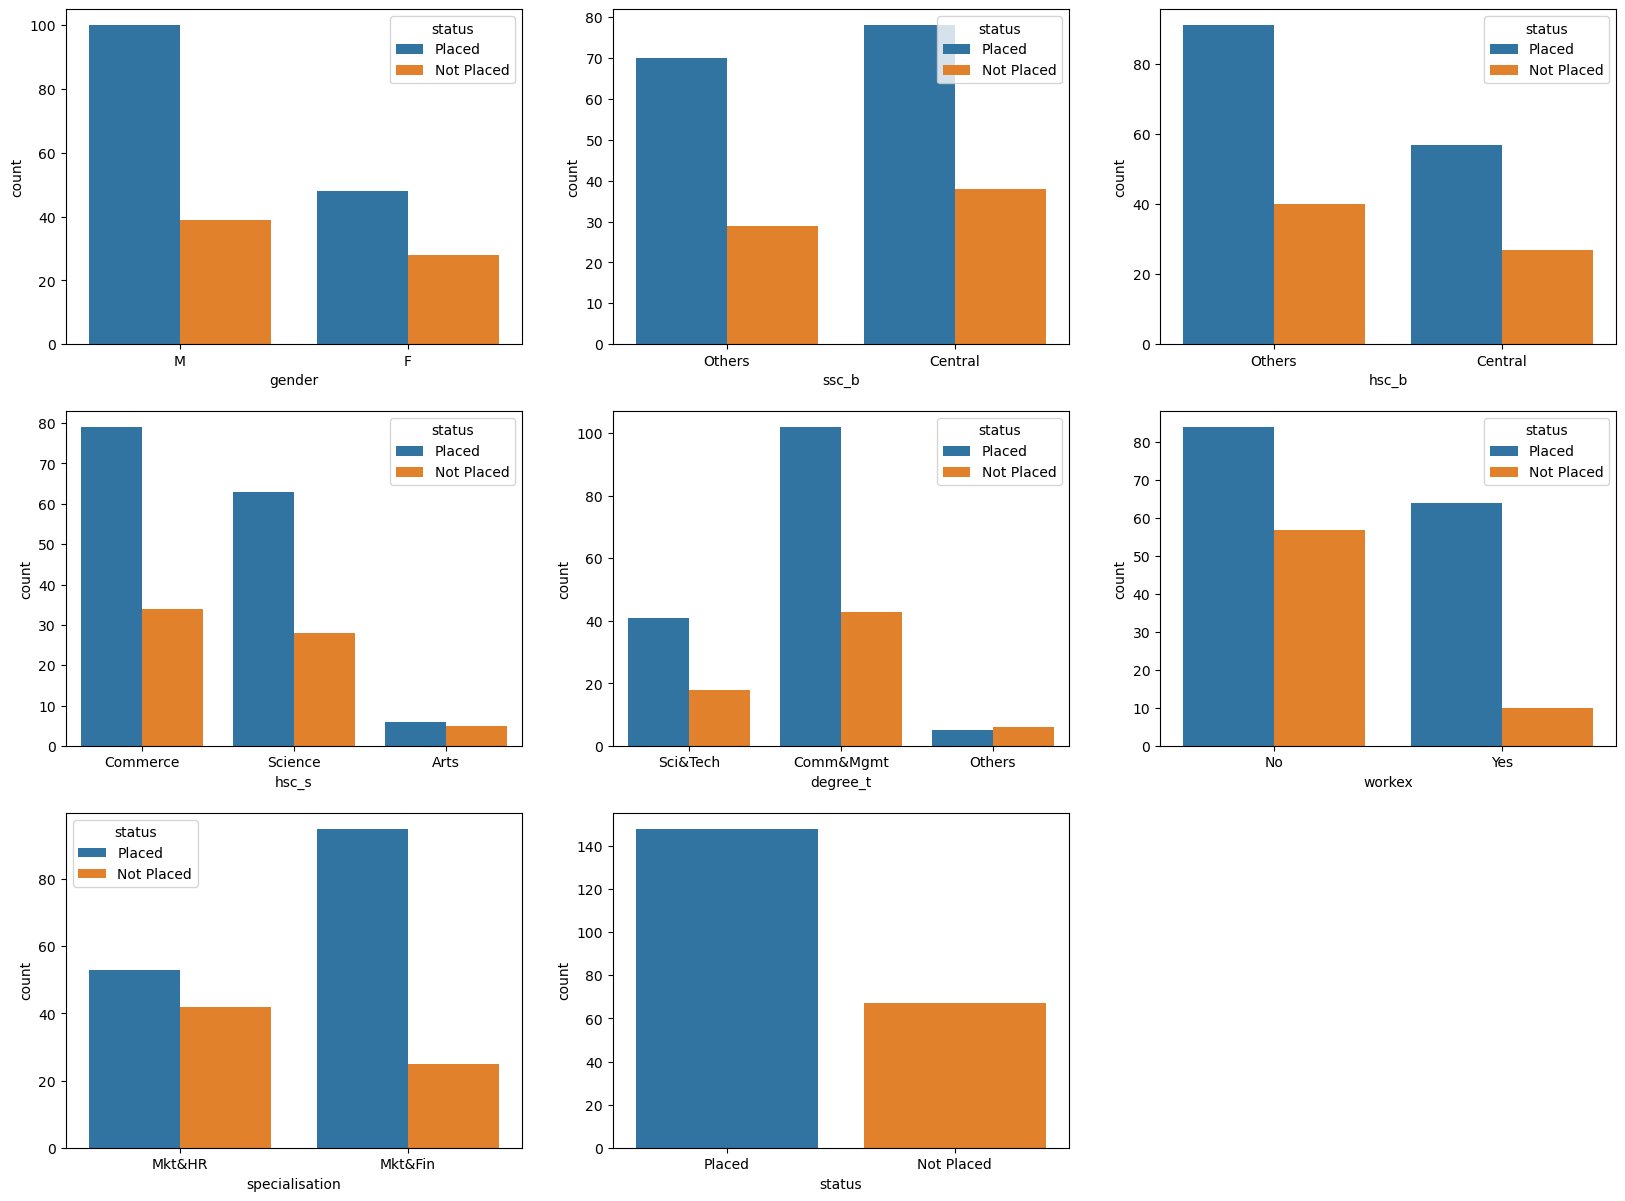

In [13]:
#Now visualize for categorical columns
plt.figure(figsize=[20,20])

for i in range(len(cat_cols)):
    plt.subplot(4,3,i+1)
    if(i<7):
        sns.countplot(x=main_df[cat_cols[i]],hue=main_df['status'])
    else:
        sns.countplot(x=main_df[cat_cols[i]])
        

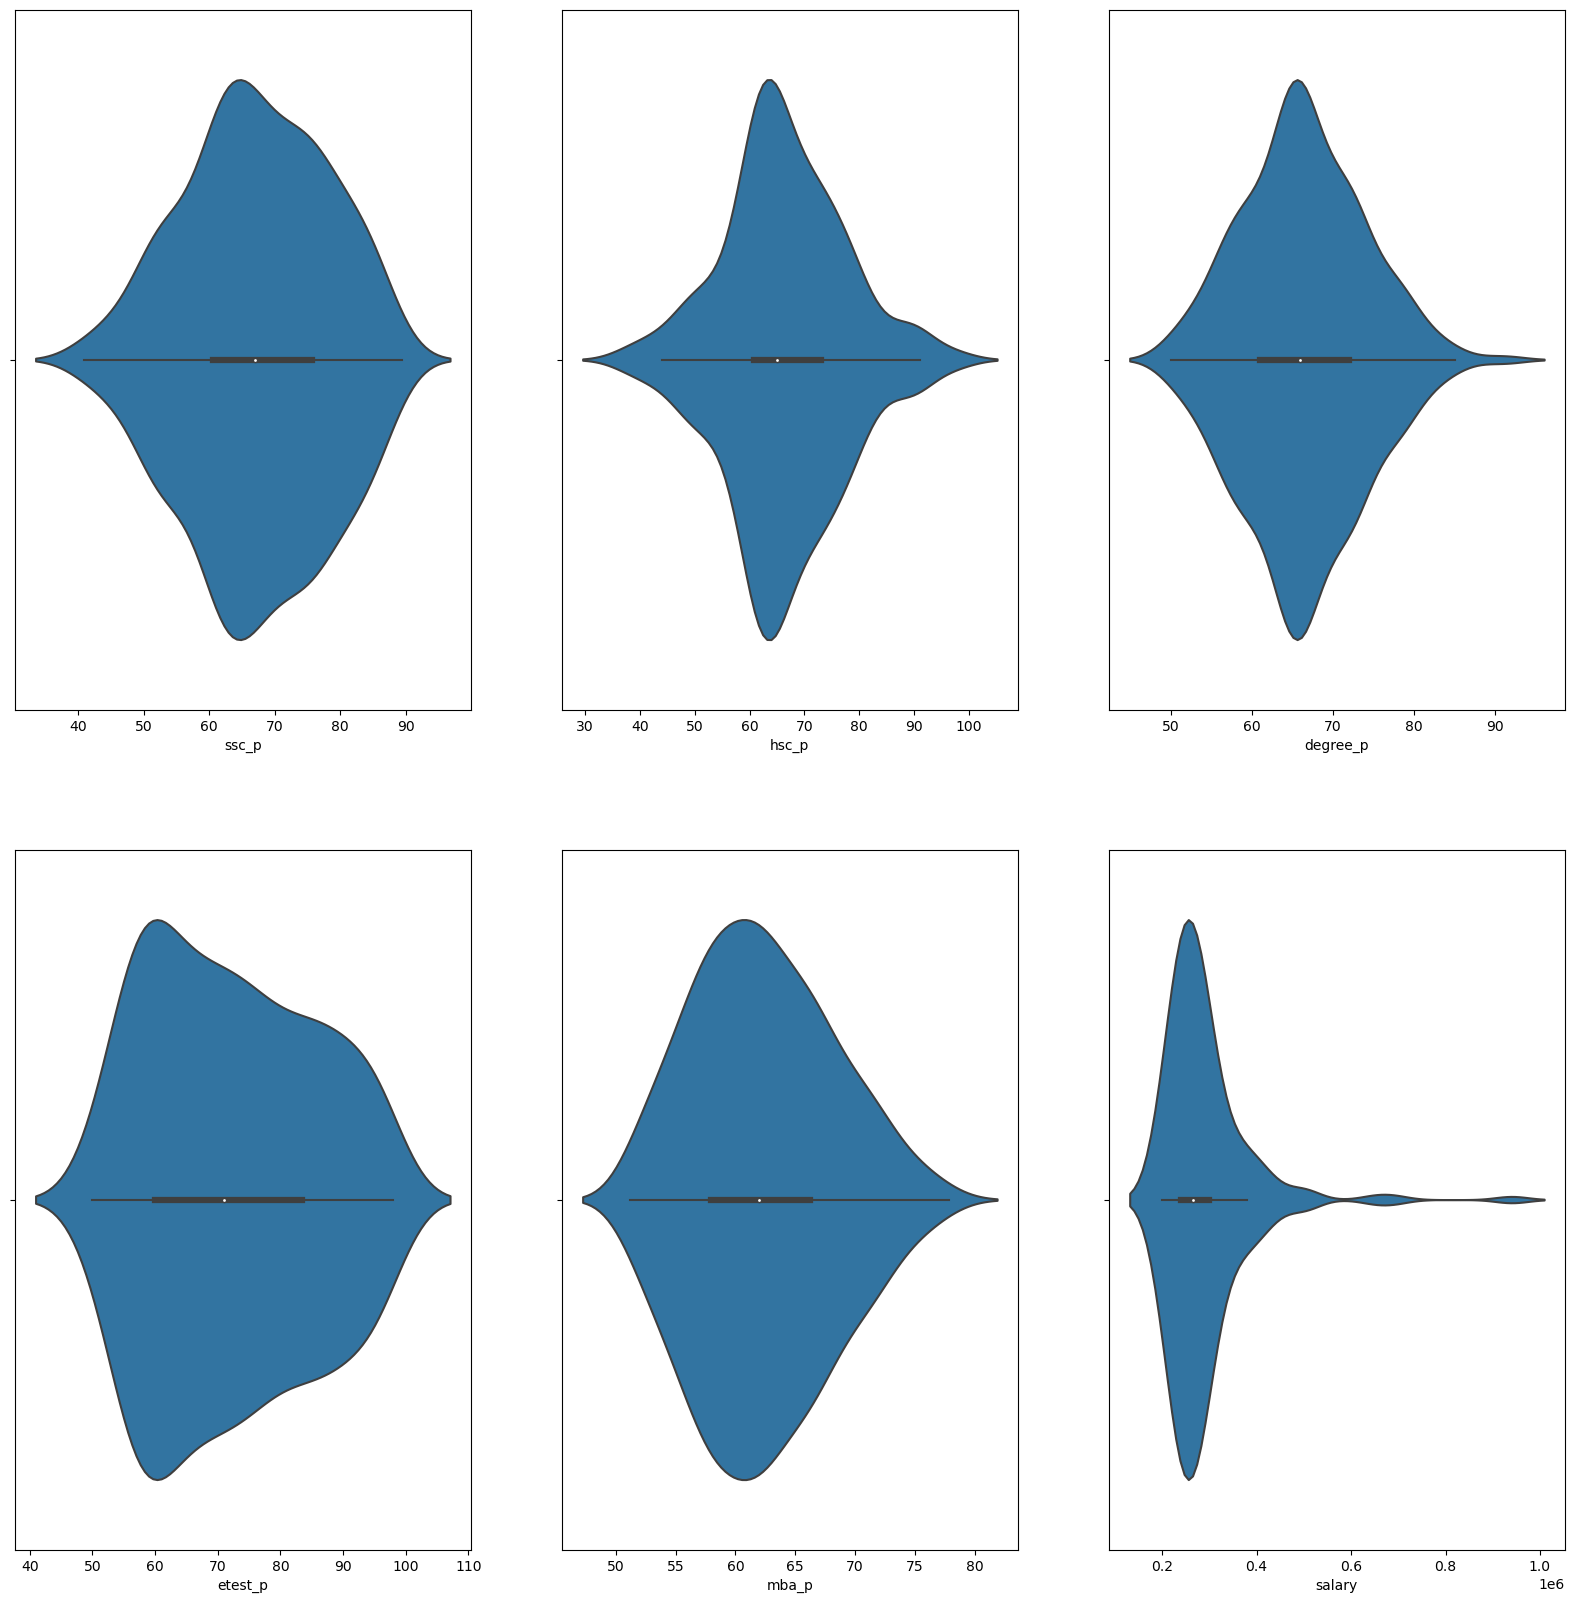

In [14]:
#violin plot for numeric columns
plt.figure(figsize=[20,20])
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.violinplot(x=main_df[num_cols[i]],hue=main_df['status'])

### Insigths:
- All the columns seem to be normally distributed except salary column
- No outlier treatment required as we are going to drop the salary column as it is

# 3. Data Transformation

In [15]:
transform_df_1=main_df.drop('salary',axis=1)
transform_df_1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


<h2> 3.1 Numeric to Categorical </h2>

In [16]:
num_cols.remove('salary')
num_cols

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [17]:
transform_df_1[num_cols].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [18]:
#functions for creating bins
def get_bins(df,col_name,bin_num):
    lower=df[col_name].min()
    upper=df[col_name].max()
    bins=np.linspace(lower ,upper,bin_num+1)
    return bins
    

In [19]:
#creating bins for each numerical column 
for i in(num_cols):
    transform_df_1[i]=pd.cut(transform_df_1[i],bins=get_bins(transform_df_1,i,2),labels=[0,1],include_lowest=True)
    
    
print(transform_df_1[num_cols].info())
transform_df_1[num_cols].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ssc_p     215 non-null    category
 1   hsc_p     215 non-null    category
 2   degree_p  215 non-null    category
 3   etest_p   215 non-null    category
 4   mba_p     215 non-null    category
dtypes: category(5)
memory usage: 3.3 KB
None


,ssc_p,hsc_p,degree_p,etest_p,mba_p
sl_no,,,,,
1,1,1,0,0,0
2,1,1,1,1,1
3,0,1,0,1,0
4,0,0,0,0,0
5,1,1,1,1,0


In [20]:
#converting the categorical columns to integer columns
for i in num_cols:
    transform_df_1[i]=transform_df_1[i].astype(int)
    
transform_df_1[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ssc_p     215 non-null    int32
 1   hsc_p     215 non-null    int32
 2   degree_p  215 non-null    int32
 3   etest_p   215 non-null    int32
 4   mba_p     215 non-null    int32
dtypes: int32(5)
memory usage: 5.9 KB


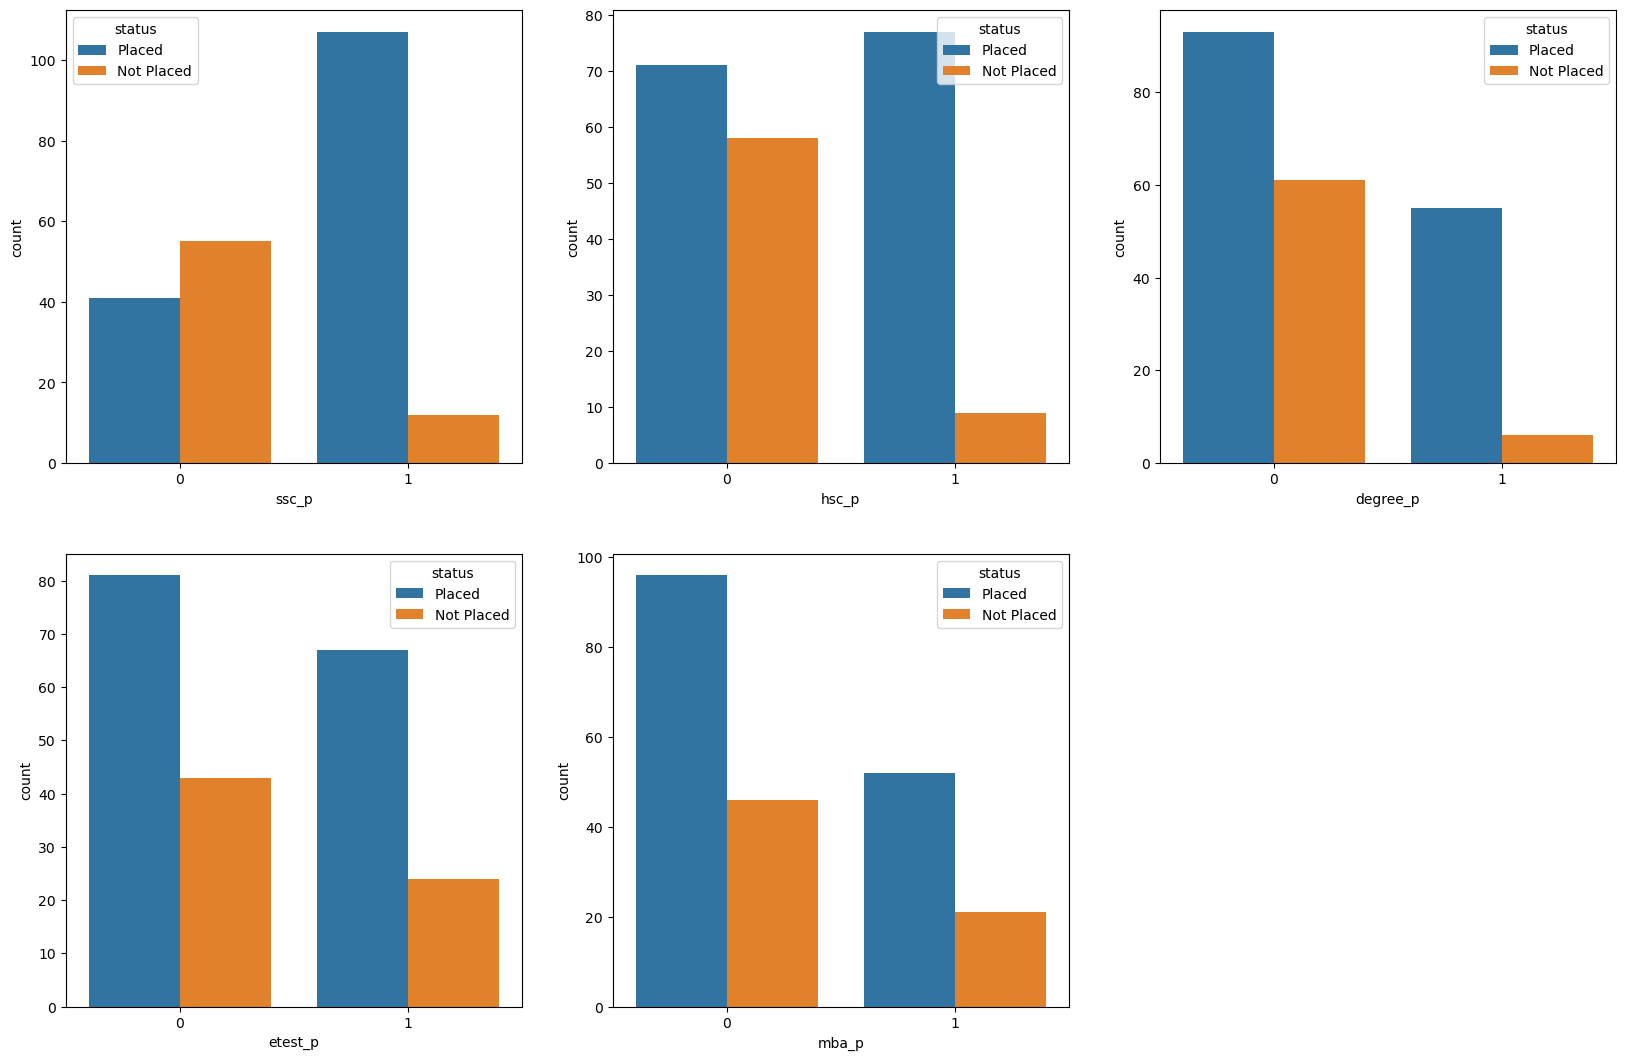

In [21]:
plt.figure(figsize=[20,20])

for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=transform_df_1[num_cols[i]],hue=transform_df_1['status'])
    

### Insights
- person with higher percentage have higher chance to get placed as compared to the person with less percentage 
- The relation can be seen easily for ssc_p,hsc_p,degree_p but not so easily for etest_p and mba_p

## 3.2 Label Encode the Categorical Columns

In [22]:
#converting the object type values into numeric
labelencoder=pre.LabelEncoder()
for i in cat_cols:
    transform_df_1[i]=labelencoder.fit_transform(transform_df_1[i])
    
transform_df_1[cat_cols].head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,1,1,1,1,2,0,1,1
2,1,0,1,2,2,1,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,2,2,0,1,0
5,1,0,0,1,0,0,0,1


## 3.3 Feature Selection

<Axes: >

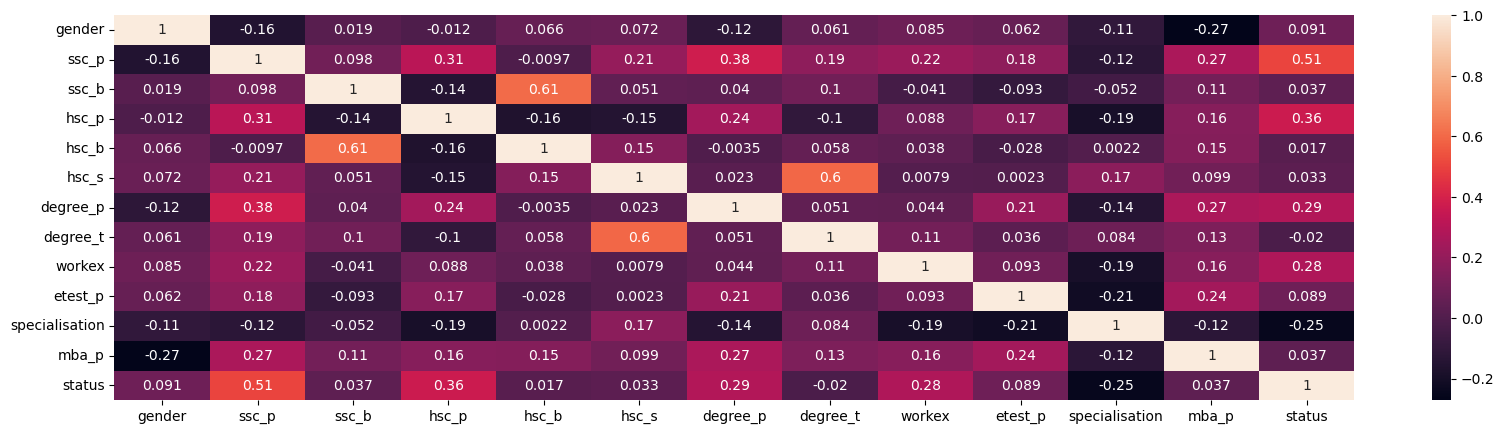

In [23]:
plt.figure(figsize=[20,5])
sns.heatmap(transform_df_1.corr(),annot=True)

In [24]:
#from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(transform_df_1.drop('status',axis=1),transform_df_1['status'])
mutual_info

array([0.        , 0.15156814, 0.02617168, 0.11699475, 0.01304448,
       0.        , 0.03504051, 0.05564226, 0.03807207, 0.        ,
       0.04314835, 0.0488223 ])

In [25]:
#see the mutual_info in a form of series 
mutual_info=pd.Series(mutual_info)
mutual_info.index=transform_df_1.drop('status',axis=1).columns
mutual_info.sort_values(ascending=False)

ssc_p             0.151568
hsc_p             0.116995
degree_t          0.055642
mba_p             0.048822
specialisation    0.043148
workex            0.038072
degree_p          0.035041
ssc_b             0.026172
hsc_b             0.013044
gender            0.000000
hsc_s             0.000000
etest_p           0.000000
dtype: float64

<h3> Insights: </h3>
<ul> In this case we take the columns that provide some info and drop the ones that don't </ul>
<ul> Generally we take the top n columns ,n defines the number of columns that the user wants to take into consideration (Generally 5 or 10)</ul>

In [26]:
#select columns that have non-zero mutual information
sel_cols=[]
for i in range(len(mutual_info)):
    if(mutual_info[i]>0):
        sel_cols.append(mutual_info.index[i])
sel_cols.append('status')
print(sel_cols)

['ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'degree_t', 'workex', 'specialisation', 'mba_p', 'status']


In [27]:
transform_df_2=transform_df_1[sel_cols]
transform_df_2.head()

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,degree_t,workex,specialisation,mba_p,status
sl_no,,,,,,,,,,
1,1,1,1,1,0,2,0,1,0,1
2,1,0,1,1,1,2,1,0,1,1
3,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,2,0,1,0,0
5,1,0,1,0,1,0,0,0,0,1


In [28]:
#To get the top 5 columns
#from sklearn.feature_selection import SelectKBest
transform_df_3=transform_df_1
sel_top5=SelectKBest(mutual_info_classif,k=5)
sel_top5.fit(transform_df_3.drop('status',axis=1),transform_df_3['status'])


#to see whish are the top 5
list(transform_df_3.drop('status',axis=1).columns[sel_top5.get_support()])


['ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation']

In [29]:
sel_top5=list(transform_df_3.drop('status',axis=1).columns[sel_top5.get_support()])
sel_top5.append('status')
transform_df_3=transform_df_3[sel_top5]
transform_df_3.head()

,ssc_p,hsc_p,degree_p,workex,specialisation,status
sl_no,,,,,,
1,1,1,0,0,1,1
2,1,1,1,1,0,1
3,0,1,0,0,0,1
4,0,0,0,0,1,0
5,1,1,1,0,0,1


# 4. Model Selection

## 4.1 Logistic Regression

#### transform_df_1

In [30]:
#from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
x=transform_df_1.drop('status',axis=1)
y=transform_df_1['status']
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

log_r.fit(x_train,y_train)
y_pred=log_r.predict(x_test)

#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

# accuracy of the model 
print("Score for transform_df_1 : {:.4f}".format(accuracy_score(y_test,y_pred)))

Score for transform_df_1 : 0.7963


<Axes: >

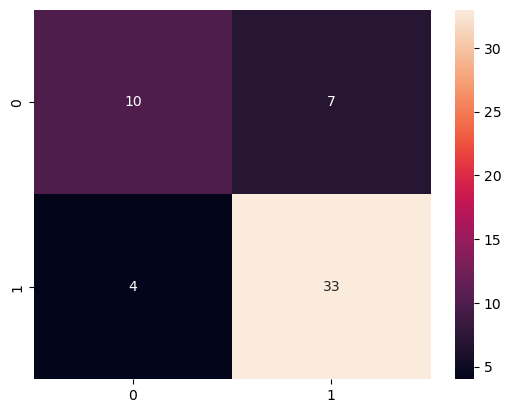

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### transform_df_2

Accuracy for the tranform_df_2 : 0.7778


<Axes: >

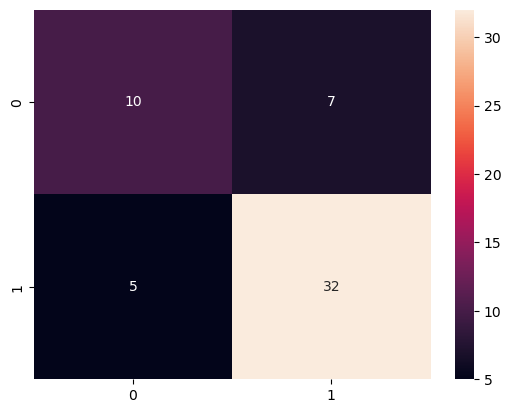

In [32]:
x=transform_df_2.drop('status',axis=1)
y=transform_df_2['status']

x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_pred=log_r.predict(x_test)

#accuracy
print("Accuracy for the tranform_df_2 : {:.4f}".format(accuracy_score(y_test,y_pred)))
#to see the differnce it create visually
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

   ### transform_df_3

Accuracy for the transform_df_3 : 0.8519


<Axes: >

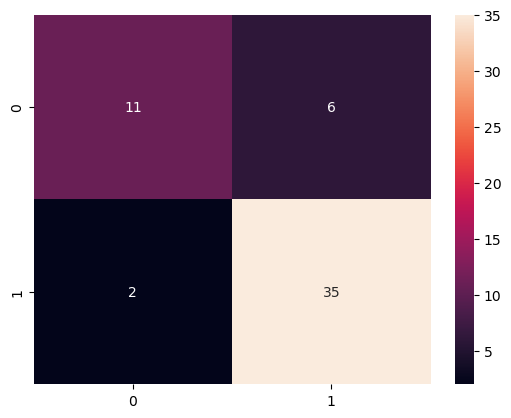

In [33]:
x=transform_df_3.drop('status',axis=1)
y=transform_df_3['status']

x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_pred=log_r.predict(x_test)

print("Accuracy for the transform_df_3 : {:.4f}".format(accuracy_score(y_test,y_pred)))


#To see the difference visualy
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [34]:
#finding the average accuracy score with k fold
#from sklearn.model_selection import StratifiedKFold
def average_accuracy(df,model):
    skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    all_accuracy=[]
    
    x=df.drop('status',axis=1)
    y=df['status']
    for train_index,test_index in skf.split(x,y):
        x_train,x_test,y_train,y_test=x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        model.fit(x_train,y_train)
        all_accuracy.append(model.score(x_test,y_test))
        
    #average of all scores
    avg=sum(all_accuracy)/len(all_accuracy)
    return avg

log_r=LogisticRegression()
print("transform_df_1 : {:.4f}".format(average_accuracy(transform_df_1,log_r)))
print("transform_df_2 : {:.4f}".format(average_accuracy(transform_df_2,log_r)))
print("transform_df_3 : {:.4f}".format(average_accuracy(transform_df_3,log_r)))
    

transform_df_1 : 0.7996
transform_df_2 : 0.7905
transform_df_3 : 0.8000


## 4.2 KNN

transform_df_1

In [35]:
#from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,algorithm='brute')

In [36]:
#train test split
x=transform_df_1.drop('status',axis=1)
y=transform_df_1['status']
x_train ,x_test,y_train,y_test=model_selection.train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [37]:
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score
print("For classification report : ")
print(classification_report(y_test,y_pred))
print("The accuracy score for transform_df_1 :{:.4f} ".format(accuracy_score(y_test,y_pred)))

For classification report : 
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        17
           1       0.83      0.78      0.81        37

    accuracy                           0.74        54
   macro avg       0.70      0.72      0.71        54
weighted avg       0.75      0.74      0.74        54

The accuracy score for transform_df_1 :0.7407 


<Axes: >

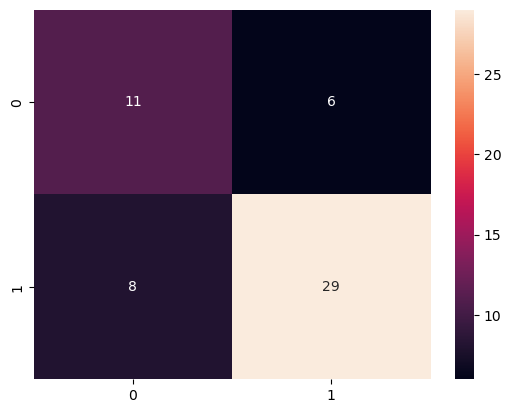

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

transform_df_2

In [39]:
#train test split
x=transform_df_2.drop('status',axis=1)
y=transform_df_2['status']
x_train ,x_test,y_train,y_test=model_selection.train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print("For classification report : ")
print(classification_report(y_test,y_pred))
print("The accuracy score for transform_df_1 :{:.4f} ".format(accuracy_score(y_test,y_pred)))

For classification report : 
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        17
           1       0.83      0.81      0.82        37

    accuracy                           0.76        54
   macro avg       0.72      0.73      0.73        54
weighted avg       0.76      0.76      0.76        54

The accuracy score for transform_df_1 :0.7593 


transform_df_3

In [40]:
#train test split
x=transform_df_3.drop('status',axis=1)
y=transform_df_3['status']
x_train ,x_test,y_train,y_test=model_selection.train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print("For classification report : ")
print(classification_report(y_test,y_pred))
print("The accuracy score for transform_df_1 :{:.4f} ".format(accuracy_score(y_test,y_pred)))

For classification report : 
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        17
           1       0.80      0.86      0.83        37

    accuracy                           0.76        54
   macro avg       0.72      0.70      0.71        54
weighted avg       0.75      0.76      0.75        54

The accuracy score for transform_df_1 :0.7593 


#### Insights
- transform_df_3 give the best accuracy in knn model

### Model Parameter Tuning

In [41]:
# from sklearn.model_selection import GridSearchCV
param = dict(n_neighbors=list(range(5,57,2)), algorithm=list(['brute','auto']))
print(param)

{'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55], 'algorithm': ['brute', 'auto']}


In [42]:
grid = GridSearchCV(knn, param, cv=10, scoring='f1')
X = transform_df_1.drop('status',axis=1)
y = transform_df_1['status']
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'algorithm': ['brute', 'auto'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55]},
             scoring='f1')

In [43]:
#examine the best model

#Single best score achieved across all params(k)

print(grid.best_score_)

#Dictionary containing the parameters(k) used to generate that score
print(grid.best_params_)

#Actual model object fit with those best parameters
#Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8440171646053999
{'algorithm': 'auto', 'n_neighbors': 41}
KNeighborsClassifier(n_neighbors=41)


In [44]:
#from sklearn.model_selection import StratifiedKFold
#making a function to find the average accuracy of k folds
def average_accuracy(df,model):
    skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    all_accuracy=[]
    
    x=df.drop('status',axis=1)
    y=df['status']
    
    for train_index,test_index in skf.split(x,y):
        x_train,x_test,y_train,y_test=x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        
        model.fit(x_train,y_train)
        all_accuracy.append(model.score(x_test,y_test))
        
        
    #averaging the scores
    avg=sum(all_accuracy)/len(all_accuracy)
    
    return avg

knn=KNeighborsClassifier(n_neighbors=41,algorithm='auto')

print("transform_df_1 : {:.4f}".format(average_accuracy(transform_df_1,knn)))
print("transform_df_2 : {:.4f}".format(average_accuracy(transform_df_2,knn)))
print("transform_df_3 : {:.4f}".format(average_accuracy(transform_df_3,knn)))

        

transform_df_1 : 0.7303
transform_df_2 : 0.7400
transform_df_3 : 0.7628


## 4.3 Naive Bayes

In [45]:
# from sklearn.naive_bayes import GaussianNB
x=transform_df_1.drop('status',axis=1)
y=transform_df_1['status']
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=9,stratify=y)

nv=GaussianNB()
nv.fit(x_train,y_train)
y_pred=nv.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.89      0.80      0.84        30

    accuracy                           0.79        43
   macro avg       0.76      0.78      0.77        43
weighted avg       0.81      0.79      0.80        43



In [46]:
x=transform_df_2.drop('status',axis=1)
y=transform_df_2['status']
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=9,stratify=y)

nv=GaussianNB()
nv.fit(x_train,y_train)
y_pred=nv.predict(x_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.90      0.87      0.88        30

    accuracy                           0.84        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.84      0.84      0.84        43



              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.92      0.80      0.86        30

    accuracy                           0.81        43
   macro avg       0.79      0.82      0.80        43
weighted avg       0.84      0.81      0.82        43



<Axes: >

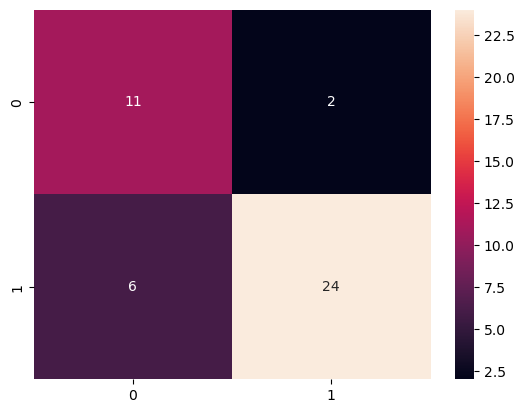

In [47]:
x=transform_df_3.drop('status',axis=1)
y=transform_df_3['status']
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=9,stratify=y)

nv=GaussianNB()
nv.fit(x_train,y_train)
y_pred=nv.predict(x_test)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [48]:
#k fold validation
#from sklearn.model_selection import StratifiedKFold
def average_accuracy(df,model):
    skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    all_accuracy=[]
    
    x=df.drop('status',axis=1)
    y=df['status']
    for train_index,test_index in skf.split(x,y):
        x_train,x_test,y_train,y_test=x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        
        model.fit(x_train,y_train)
        all_accuracy.append(model.score(x_test,y_test))
        
    #average
    avg=sum(all_accuracy)/len(all_accuracy)
    return avg

nv=GaussianNB()
print("transform_df_1 : {:.4f}".format(average_accuracy(transform_df_1,nv)))
print("transform_df_2 : {:.4f}".format(average_accuracy(transform_df_2,nv)))
print("transform_df_3 : {:.4f}".format(average_accuracy(transform_df_3,nv)))

transform_df_1 : 0.7576
transform_df_2 : 0.7667
transform_df_3 : 0.7766


## 4.4 SVM 
support vector machine

In [49]:
#from sklearn.svm import SVC
#SVC means support vector classifier
svm=SVC(kernel='linear',class_weight={0:5,1:5})

x=transform_df_1.drop('status',axis=1)
y=transform_df_1['status']

x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.90      0.87      0.89        31

    accuracy                           0.84        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.84      0.84      0.84        43



In [50]:
#from sklearn.model_selection import GridSearchCV
param={'kernel': ['linear','poly','rbf','sigmoid'], 
       'class_weight':[{0:6,1:1},{0:5,1:1},{0:4,1:1},{0:3,1:1},{0:2,1:1},]}

model=SVC()
search=GridSearchCV(model,param,cv=10,scoring='f1')

In [51]:
#execute search
x=transform_df_1.drop('status',axis=1)
y=transform_df_1['status']
result=search.fit(x,y)


In [52]:
print("Best score : {:.4f}".format(result.best_score_))
print("Best Hyperparameters : ",result.best_params_)

Best score : 0.8213
Best Hyperparameters :  {'class_weight': {0: 2, 1: 1}, 'kernel': 'linear'}


In [53]:
#k fold validation
def average_accuracy(df,model):
    skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    all_accuracy=[]
    x=df.drop('status',axis=1)
    y=df['status']
    for train_index,test_index in skf.split(x,y):
        x_train,x_test,y_train,y_test=x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        model.fit(x_train,y_train)
        all_accuracy.append(model.score(x_test,y_test))
    avg=sum(all_accuracy)/len(all_accuracy)
    return avg

svm=SVC(class_weight={0:2,1:1},kernel='linear')
print("transform_df_1 : {:.4f}".format(average_accuracy(transform_df_1,svm)))
print("transform_df_2 : {:.4f}".format(average_accuracy(transform_df_2,svm)))
print("transform_df_3 : {:.4f}".format(average_accuracy(transform_df_3,svm)))

transform_df_1 : 0.7626
transform_df_2 : 0.7346
transform_df_3 : 0.7487


## 4.5 Decision Tree /CART

In [54]:
#train test split
x=transform_df_1.drop('status',axis=1)
y=transform_df_1['status']

x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

# from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.85      0.71      0.77        31

    accuracy                           0.70        43
   macro avg       0.66      0.69      0.66        43
weighted avg       0.74      0.70      0.71        43



In [55]:
param={'criterion': ['gini','entropy'],
       'max_depth': [5,10,15],
       'class_weight': [{0:6,1:1},{0:5,1:1},{0:4,1:1},{0:3,1:1},{0:2,1:1},{0:1,1:1},],
       'min_samples_leaf': [1,2,3]}

model=DecisionTreeClassifier(random_state=42)
search=GridSearchCV(model,param,cv=10,scoring='f1')

#execute search
result=search.fit(x,y)

#summarizing results
print("Best Score : ",result.best_score_)
print("Best parameters : ",result.best_params_)

Best Score :  0.8058204996914675
Best parameters :  {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}


In [56]:
dtree=DecisionTreeClassifier(class_weight={0:1,1:1},criterion='gini',max_depth=10,min_samples_leaf=1)

print("transform_df_1 : {:.4f}".format(average_accuracy(transform_df_1,dtree)))
print("transform_df_2 : {:.4f}".format(average_accuracy(transform_df_2,dtree)))
print("transform_df_3 : {:.4f}".format(average_accuracy(transform_df_3,dtree)))

transform_df_1 : 0.6838
transform_df_2 : 0.7119
transform_df_3 : 0.7539


Since the model accuracy is very low 
Let's check for overfitting 

In [57]:
#checking for overfitting 
x=transform_df_3.drop('status',axis=1)
y=transform_df_3['status']
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=42)
dtree=DecisionTreeClassifier(class_weight={0:2,1:1},criterion='gini',max_depth=3,min_samples_leaf=1)
dtree.fit(x_train,y_train)
print("Traning Accuracy : {:.4f}".format(dtree.score(x_train,y_train)))
print("Testing Accuracy : {:.4f}".format(dtree.score(x_test,y_test)))
#it is overfitting

Traning Accuracy : 0.8023
Testing Accuracy : 0.7209


# 5. Oversampling and Undersampling

## 5.1 Over Sampling

In [58]:
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#from sklearn.datasets import make_classifictaion

x=transform_df_3.drop('status',axis=1)
y=transform_df_3['status']
print("Before sampling : ",pd.Series(y).value_counts(),sep='\n',end='\n\n\n')

#define dataset
x,y=make_classification(n_samples=200,weights=[0.70],flip_y=0)

#define oversampling strategy
oversample=RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform 
x_over,y_over=oversample.fit_resample(x,y)

print("After sampling : ",pd.Series(y_over).value_counts(),sep='\n')

Before sampling : 
1    148
0     67
Name: status, dtype: int64


After sampling : 
0    140
1    140
dtype: int64


In [59]:
def KFold_accuracy(x,y,model):
    skf=StratifiedKFold(n_splits=10,shuffle=True)
    all_accuracy=[]
    for train_index,test_index in skf.split(x,y):
        x_train,x_test,y_train,y_test=x[train_index],x[test_index],y[train_index],y[test_index]
        
        model.fit(x_train,y_train)
        all_accuracy.append(model.score(x_test,y_test))
        
    avg=sum(all_accuracy)/len(all_accuracy)
    return avg



In [60]:
#now checking for all the models
#logistic regression
log_r=LogisticRegression()
print("Logistic Regression : {:.4f}".format(KFold_accuracy(x_over,y_over,log_r)))

#K nearest neighbours
knn=KNeighborsClassifier(n_neighbors=43)
print("K Nearest Neighbour : {:.4f}".format(KFold_accuracy(x_over,y_over,knn)))

#navie bayes
nv=GaussianNB()
print("Navie Bayes : {:.4f}".format(KFold_accuracy(x_over,y_over,nv)))

#SVM

svm=SVC(class_weight={0:2,1:1},kernel='rbf')
print("SVM : {:.4f}".format(KFold_accuracy(x_over,y_over,svm)))

#Decision treee
dtree=DecisionTreeClassifier(class_weight={0:2,1:1},criterion='gini',max_depth=3,min_samples_leaf=1)
print("Decision tree : {:.4f}".format(KFold_accuracy(x_over,y_over,dtree)))

Logistic Regression : 0.9036
K Nearest Neighbour : 0.8893
Navie Bayes : 0.9000
SVM : 0.9321
Decision tree : 0.9214


## 5.2 Under Sampling:

In [74]:
x=transform_df_3.drop('status',axis=1)
y=transform_df_3['status']

print("Before Sampling : ",pd.Series(y).value_counts(),sep='\n')

x,y=make_classification(n_samples=300,weights=[0.70],flip_y=0)

undersample=RandomUnderSampler(sampling_strategy='majority')
x_under,y_under=undersample.fit_resample(x,y)

print("After Sampling : ",pd.Series(y_under).value_counts(),sep='\n')

Before Sampling : 
1    148
0     67
Name: status, dtype: int64
After Sampling : 
0    90
1    90
dtype: int64


In [75]:
#now checking for all the models
#logistic regression
log_r=LogisticRegression()
print("Logistic Regression : {:.4f}".format(KFold_accuracy(x_under,y_under,log_r)))

#K nearest neighbours
knn=KNeighborsClassifier(n_neighbors=43)
print("K Nearest Neighbour : {:.4f}".format(KFold_accuracy(x_under,y_under,knn)))

#navie bayes
nv=GaussianNB()
print("Navie Bayes : {:.4f}".format(KFold_accuracy(x_under,y_under,nv)))

#SVM

svm=SVC(class_weight={0:2,1:1},kernel='linear')
print("SVM : {:.4f}".format(KFold_accuracy(x_under,y_under,svm)))

#Decision treee
dtree=DecisionTreeClassifier(class_weight={0:2,1:1},criterion='gini',max_depth=10,min_samples_leaf=1)
print("Decision tree : {:.4f}".format(KFold_accuracy(x_under,y_under,dtree)))

Logistic Regression : 0.9056
K Nearest Neighbour : 0.9056
Navie Bayes : 0.9056
SVM : 0.9222
Decision tree : 0.9056
